In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

In [2]:
df = pd.read_csv("marketing.csv")
df
# Display the first 5 rows
print(df.head())

# Check the shape
print("Shape of the dataset:", df.shape)

# Check the info
print("\nInfo of the dataset:")
print(df.info())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0    4/9/2012       58       635  ...                   10                  4   
1    8/3/2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3   10/2/2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  Accepted

# Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [3]:
# Check the info
print("\nInfo of the dataset:")
print(df.info())

# Check the percentage of missing values
missing_percentage = df.isnull().mean() * 100

# Display the missing percentage
print("\nPercentage of missing values:")
print(missing_percentage)

# Treat missing values if present
# Convert "Income" column to numeric values, handling malformed strings
df["Income"] = pd.to_numeric(df["Income"], errors="coerce")

# Fill missing values with the median of the column
df["Income"].fillna(df["Income"].median(), inplace=True)



Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchase

# Check if there are any duplicate records in the dataset? If any drop them.

In [5]:
df.duplicated().sum()

0

No duplicates are found

# Drop the columns which you think redundant for the analysis

In [6]:
# List of columns to drop
columns_to_drop = ['ID', 'Dt_Customer']

# Drop the columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Print the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0           1957  Graduation         Single  58138.0        0         0   
1           1954  Graduation         Single  46344.0        1         1   
2           1965  Graduation       Together  71613.0        0         0   
3           1984  Graduation       Together  26646.0        1         0   
4           1981         PhD        Married  58293.0        1         0   
...          ...         ...            ...      ...      ...       ...   
2235        1967  Graduation        Married  61223.0        0         1   
2236        1946         PhD       Together  64014.0        2         1   
2237        1981  Graduation       Divorced  56981.0        0         0   
2238        1956      Master       Together  69245.0        0         1   
2239        1954         PhD        Married  52869.0        1         1   

      Recency  MntWines  MntFruits  MntMeatProducts  ...  NumCatalogPurchases  \
0          58     

# Check the unique categories in the column 'Marital_Status

In [7]:
# Check unique categories in 'Marital_Status'
unique_categories = df['Marital_Status'].unique()
print(unique_categories)

# Group categories 'Married' and 'Together' as 'relationship'
df['Marital_Status'] = df['Marital_Status'].replace(['Married', 'Together'], 'relationship')

# Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'], 'Single')

# Print the updated DataFrame
print(df['Marital_Status'])

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
0             Single
1             Single
2       relationship
3       relationship
4       relationship
            ...     
2235    relationship
2236    relationship
2237          Single
2238    relationship
2239    relationship
Name: Marital_Status, Length: 2240, dtype: object


# Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses

In [8]:
# Create a new column 'Total_Expenses' by summing the individual expense columns
df['Total_Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Print the updated DataFrame
print(df['Total_Expenses'])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Expenses, Length: 2240, dtype: int64


# Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [9]:
# Create a new column 'Num_Total_Purchases' by summing the individual purchase columns
df['Num_Total_Purchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

# Print the updated DataFrame
print(df['Num_Total_Purchases'])

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Num_Total_Purchases, Length: 2240, dtype: int64


# Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [10]:
df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Kids']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Kids, Length: 2240, dtype: int64

# Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [12]:
df['TotalAcceptedCmp'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].sum(axis=1)
df['TotalAcceptedCmp']

0       1
1       0
2       0
3       0
4       0
       ..
2235    0
2236    1
2237    1
2238    0
2239    1
Name: TotalAcceptedCmp, Length: 2240, dtype: int64

# Drop those columns which we have used above for obtaining new features

In [13]:
# List of columns to drop
columns_to_drop = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Kidhome', 'Teenhome', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Drop the columns from the DataFrame if they exist
df = df.drop(columns=columns_to_drop, errors='ignore')

# Print the updated DataFrame
print(df)

      Year_Birth   Education Marital_Status   Income  Recency  \
0           1957  Graduation         Single  58138.0       58   
1           1954  Graduation         Single  46344.0       38   
2           1965  Graduation   relationship  71613.0       26   
3           1984  Graduation   relationship  26646.0       26   
4           1981         PhD   relationship  58293.0       94   
...          ...         ...            ...      ...      ...   
2235        1967  Graduation   relationship  61223.0       46   
2236        1946         PhD   relationship  64014.0       56   
2237        1981  Graduation         Single  56981.0       91   
2238        1956      Master   relationship  69245.0        8   
2239        1954         PhD   relationship  52869.0       40   

      NumWebVisitsMonth  Complain  Total_Expenses  Num_Total_Purchases  Kids  \
0                     7         0            1617                   25     0   
1                     5         0              27          

# Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [14]:
# Extracting 'age' from 'Year_Birth'
df['age'] = pd.to_datetime('today').year - df['Year_Birth']

# Dropping the 'Year_Birth' column
df = df.drop(columns=['Year_Birth'])

# Print the updated DataFrame
print(df)

       Education Marital_Status   Income  Recency  NumWebVisitsMonth  \
0     Graduation         Single  58138.0       58                  7   
1     Graduation         Single  46344.0       38                  5   
2     Graduation   relationship  71613.0       26                  4   
3     Graduation   relationship  26646.0       26                  6   
4            PhD   relationship  58293.0       94                  5   
...          ...            ...      ...      ...                ...   
2235  Graduation   relationship  61223.0       46                  5   
2236         PhD   relationship  64014.0       56                  7   
2237  Graduation         Single  56981.0       91                  6   
2238      Master   relationship  69245.0        8                  3   
2239         PhD   relationship  52869.0       40                  7   

      Complain  Total_Expenses  Num_Total_Purchases  Kids  TotalAcceptedCmp  \
0            0            1617                   25     

In [15]:
df

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age
0,Graduation,Single,58138.0,58,7,0,1617,25,0,1,67
1,Graduation,Single,46344.0,38,5,0,27,6,2,0,70
2,Graduation,relationship,71613.0,26,4,0,776,21,0,0,59
3,Graduation,relationship,26646.0,26,6,0,53,8,1,0,40
4,PhD,relationship,58293.0,94,5,0,422,19,1,0,43
...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,relationship,61223.0,46,5,0,1341,18,1,0,57
2236,PhD,relationship,64014.0,56,7,0,444,22,3,1,78
2237,Graduation,Single,56981.0,91,6,0,1241,19,0,1,43
2238,Master,relationship,69245.0,8,3,0,843,23,1,0,68


# Encode the categorical variables in the dataset

In [16]:
# Select categorical columns for encoding
categorical_columns = ['Marital_Status', 'Education']

# Perform one-hot encoding using get_dummies()
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Print the updated DataFrame with encoded categorical variables
print(df_encoded)

       Income  Recency  NumWebVisitsMonth  Complain  Total_Expenses  \
0     58138.0       58                  7         0            1617   
1     46344.0       38                  5         0              27   
2     71613.0       26                  4         0             776   
3     26646.0       26                  6         0              53   
4     58293.0       94                  5         0             422   
...       ...      ...                ...       ...             ...   
2235  61223.0       46                  5         0            1341   
2236  64014.0       56                  7         0             444   
2237  56981.0       91                  6         0            1241   
2238  69245.0        8                  3         0             843   
2239  52869.0       40                  7         0             172   

      Num_Total_Purchases  Kids  TotalAcceptedCmp  age  Marital_Status_Single  \
0                      25     0                 1   67            

# Standardize the columns, so that values are in a particular range

In [17]:
# Print the column names
print(df.columns)

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'age'],
      dtype='object')


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder



# Select the numeric columns to be standardized
numeric_columns = ['Income', 'Recency', 'NumWebVisitsMonth', 'Total_Expenses',
                   'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age']

# Select the categorical columns to be encoded
categorical_columns = ['Education', 'Marital_Status', 'Complain']

# Preprocess numeric columns
numeric_data = df[numeric_columns].values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)
df[numeric_columns] = scaled_data

# Preprocess categorical columns
label_encoders = {}
for column in categorical_columns:
    encoder = LabelEncoder()
    encoded_values = encoder.fit_transform(df[column])
    df[column] = encoded_values
    label_encoders[column] = encoder

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   int64  
 1   Marital_Status       2240 non-null   int64  
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   float64
 4   NumWebVisitsMonth    2240 non-null   float64
 5   Complain             2240 non-null   int64  
 6   Total_Expenses       2240 non-null   float64
 7   Num_Total_Purchases  2240 non-null   float64
 8   Kids                 2240 non-null   float64
 9   TotalAcceptedCmp     2240 non-null   float64
 10  age                  2240 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 192.6 KB
None


# Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [20]:
df.dtypes

Education                int64
Marital_Status           int64
Income                 float64
Recency                float64
NumWebVisitsMonth      float64
Complain                 int64
Total_Expenses         float64
Num_Total_Purchases    float64
Kids                   float64
TotalAcceptedCmp       float64
age                    float64
dtype: object

Number of components explaining 90% of variance: 9
Explained variance ratio for 9 components: 0.9551984617184687
Component 1:
Feature Education: 0.08108406019411585
Feature Marital_Status: -0.01659064904180117
Feature Income: 0.45390341548294977
Feature Recency: -0.004888013622165789
Feature NumWebVisitsMonth: -0.37863732361344216
Feature Complain: -0.029067620907611856
Feature Total_Expenses: 0.513791635647365
Feature Num_Total_Purchases: 0.4290144364542803
Feature Kids: -0.32484272152151383
Feature TotalAcceptedCmp: 0.279860400562689
Feature age: 0.10491379217328656

Component 2:
Feature Education: 0.5512970877562602
Feature Marital_Status: 0.07246445014707265
Feature Income: 0.11157941966481397
Feature Recency: 0.1129115896950636
Feature NumWebVisitsMonth: 0.03886103317416364
Feature Complain: 0.021835054172531055
Feature Total_Expenses: -0.03713056888529527
Feature Num_Total_Purchases: 0.13855544686083118
Feature Kids: 0.4216614030197821
Feature TotalAcceptedCmp: -0.180926581040715

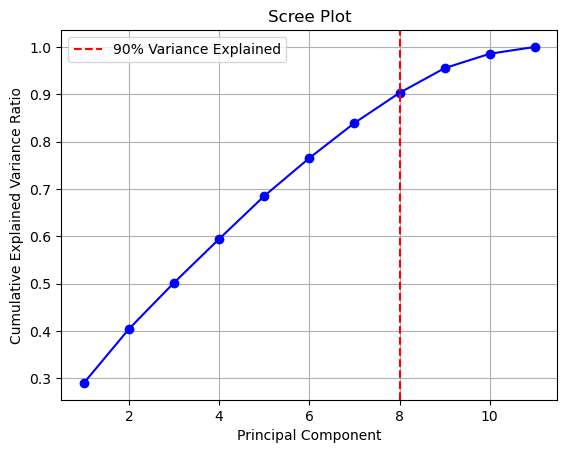

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Assuming you have loaded your dataset into the 'df' DataFrame

# Select numeric columns for standardization
numeric_columns = df.select_dtypes(include=np.number).columns

# Standardize the numeric columns in the dataset
std_dev = df[numeric_columns].std()
std_dev_nonzero = std_dev.replace(0, 0.0001)
standardized_data = (df[numeric_columns] - df[numeric_columns].mean()) / std_dev_nonzero

# Fill missing values with 0 after standardization
standardized_data = standardized_data.fillna(0)

# Initialize PCA
pca = PCA()

# Apply PCA on the standardized data
pca.fit(standardized_data)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 95% of the variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1

# Print the number of components
print("Number of components explaining 90% of variance:", n_components)

# Calculate the explained variance ratio for the selected number of components
explained_variance_ratio = cumulative_variance_ratio[n_components - 1]

# Print the explained variance ratio
print("Explained variance ratio for", n_components, "components:", explained_variance_ratio)

# Get the PCA components
components = pca.components_

# List the components and their feature weights
for i, component in enumerate(components[:n_components]):
    print(f"Component {i+1}:")
    for j, weight in enumerate(numeric_columns):
        print(f"Feature {weight}: {component[j]}")
    print()

# Calculate cumulative explained variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components explaining 90% of variance
n_components_90 = np.where(cumulative_variance_ratio >= 0.9)[0][0] + 1

# Generate scree plot
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio, 'bo-')
plt.axvline(x=n_components_90, color='r', linestyle='--', label='90% Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)

# Add legend
plt.legend()

plt.show()


# Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [22]:
column_names = df.columns.tolist()
print(column_names)

['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age']


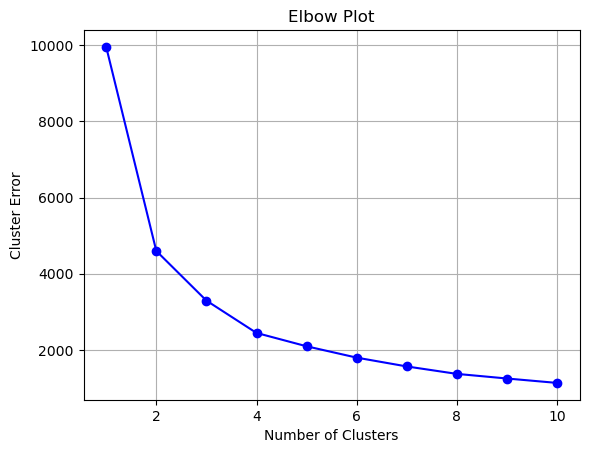

Cluster Assignments:
   Cluster  Education  Marital_Status    Income   Recency  NumWebVisitsMonth  \
0        1          2               0  0.235696  0.307039           0.693904   
1        0          2               0 -0.235454 -0.383664          -0.130463   
2        4          2               1  0.773999 -0.798086          -0.542647   
3        2          2               1 -1.022355 -0.798086           0.281720   
4        4          4               1  0.241888  1.550305          -0.130463   

   Complain  Total_Expenses  Num_Total_Purchases      Kids  TotalAcceptedCmp  \
0         0        1.679417             1.320826 -1.264505          0.621248   
1         0       -0.961275            -1.154596  1.396361         -0.501912   
2         0        0.282673             0.799685 -1.264505         -0.501912   
3         0       -0.918094            -0.894025  0.065928         -0.501912   
4         0       -0.305254             0.539114  0.065928         -0.501912   

        age  
0  

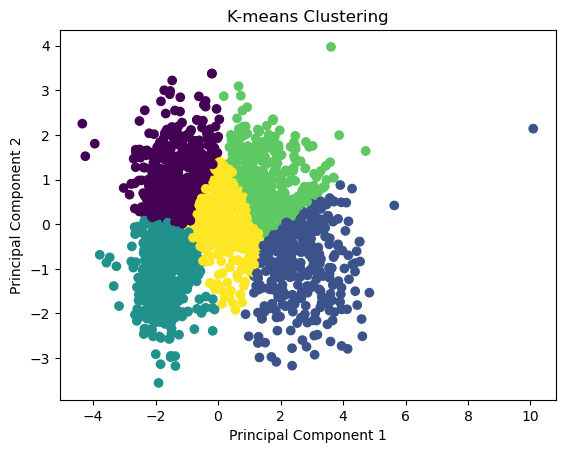

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming you have loaded your dataset into the 'df' DataFrame

# Select the columns for clustering
columns_for_clustering = ['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth', 'Complain',
                          'Total_Expenses', 'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp', 'age']

# Create a new DataFrame with the selected columns
data_for_clustering = df[columns_for_clustering].copy()

# Handle missing values
data_for_clustering = data_for_clustering.dropna()

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in data_for_clustering.select_dtypes(include='object'):
    data_for_clustering[column] = label_encoder.fit_transform(data_for_clustering[column])

# Standardize the data
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(data_for_clustering)

# Apply PCA on the data for dimensionality reduction
pca = PCA(n_components=2)
pca_transformed_data = pca.fit_transform(data_for_clustering)

# Determine the optimal number of clusters using elbow plot
cluster_errors = []
max_clusters = 10
for num_clusters in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init=10)
    kmeans.fit(pca_transformed_data)
    cluster_errors.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, max_clusters + 1), cluster_errors, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Error')
plt.title('Elbow Plot')
plt.grid(True)
plt.show()

# Apply K-means clustering with the optimal number of clusters
optimal_num_clusters = 5
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(pca_transformed_data)

# Set the number of decimals for numpy print options
np.set_printoptions(precision=4)

# Create a DataFrame to hold the cluster labels
cluster_df = pd.DataFrame(cluster_labels, columns=['Cluster'])

# Concatenate the cluster labels DataFrame with the original DataFrame
df = pd.concat([df, cluster_df], axis=1)

# Print the cluster assignments
print("Cluster Assignments:")
print(df[['Cluster'] + columns_for_clustering].head())  # Print the head of the DataFrame

# Visualize the clusters
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], c=cluster_labels)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering')
plt.show()


# Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

In [24]:
import pandas as pd

# Load the data
df = pd.read_csv('marketing.csv')

# Print the column names
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In [25]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Load the data
df = pd.read_csv('marketing.csv')

# Drop 'ID' and 'Dt_Customer' columns
df = df.drop(columns=['ID', 'Dt_Customer'])

# Convert 'Year_Birth' to 'Age'
df['Age'] = 2023 - df['Year_Birth']

# Now drop the 'Year_Birth' column as it's no longer needed
df = df.drop(columns=['Year_Birth'])

# Define which columns should be encoded vs scaled
columns_to_encode = ['Education', 'Marital_Status']
columns_to_scale = [col for col in df.columns if col not in columns_to_encode]

# Instantiate encoder/scaler
scaler = StandardScaler()
ohe = OneHotEncoder(drop='first')
num_imputer = SimpleImputer(strategy='mean')  # Using mean strategy for imputation
cat_imputer = SimpleImputer(strategy='most_frequent')  # Using most_frequent strategy for imputation

# Combine the encoder/scaler to preprocess data
preprocess = ColumnTransformer(
    transformers=[
        ('impute_encode', make_pipeline(cat_imputer, ohe), columns_to_encode),
        ('impute_scale', make_pipeline(num_imputer, scaler), columns_to_scale)])

df_std = preprocess.fit_transform(df)

# Applying Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(df_std)

# Adding cluster labels to the dataframe
df['cluster_labels'] = clusters

# Listing features and cluster labels
print("Features: ", df.columns[:-1])  # Excluding 'cluster_labels'
print("Cluster Labels: ", np.unique(clusters))

# For numerical columns, calculate the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
numeric_cluster_analysis = df[numerical_cols].groupby('cluster_labels').mean()

# For categorical columns, calculate the mode (most frequent category)
categorical_cols = df.select_dtypes(include=[object]).columns
categorical_cols_with_labels = list(categorical_cols) + ['cluster_labels']
categorical_cluster_analysis = df[categorical_cols_with_labels].groupby('cluster_labels').agg(lambda x: x.mode().iloc[0])

# Combine both dataframes for the final cluster analysis
cluster_analysis = pd.concat([numeric_cluster_analysis, categorical_cluster_analysis], axis=1)

# Printing the cluster analysis
cluster_analysis


Features:  Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Age'],
      dtype='object')
Cluster Labels:  [0 1 2]


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education,Marital_Status
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,75886.800000,0.042017,0.213445,49.346218,597.805042,65.556303,434.001681,93.966387,66.364706,76.166387,...,0.052101,0.152941,0.263866,0.240336,0.05042,0.000000,0.285714,54.904202,Graduation,Married
1,34783.228571,0.795193,0.453501,50.308255,47.125392,5.776385,26.615465,7.737722,5.459770,15.180773,...,0.003135,0.000000,0.001045,0.000000,0.00000,0.021944,0.072100,51.723093,Graduation,Married
2,56000.801762,0.303779,0.832849,47.236919,407.010174,20.905523,131.200581,30.148256,23.123547,56.340116,...,0.187500,0.110465,0.007267,0.001453,0.00000,0.000000,0.138081,57.017442,Graduation,Married


# Visualization and Interpretation of results¶


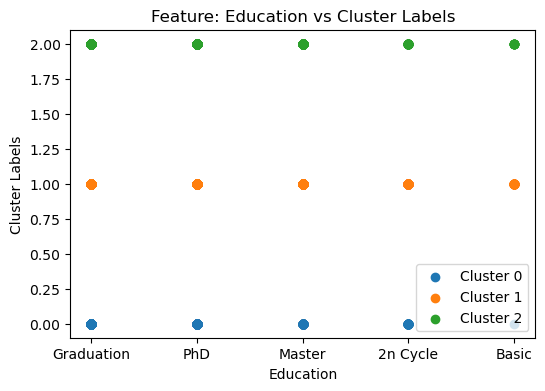

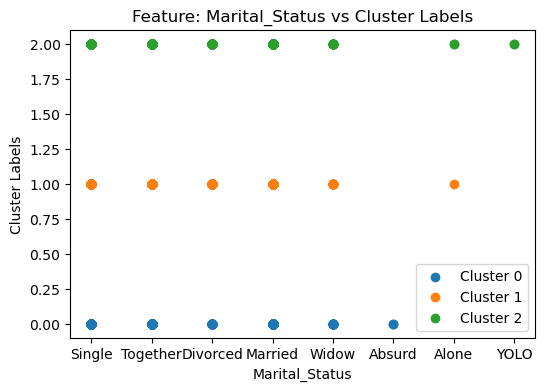

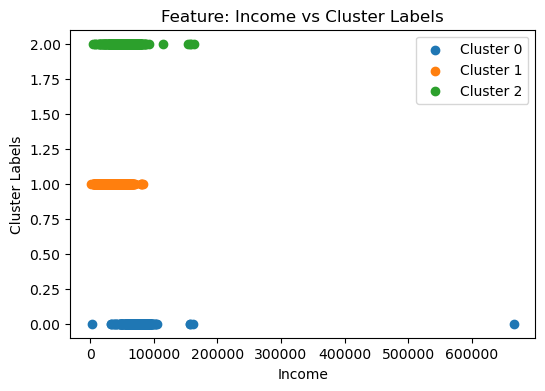

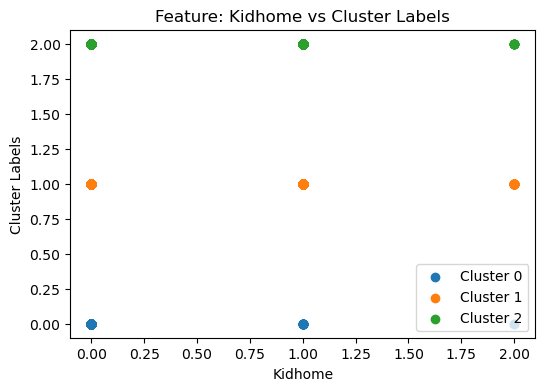

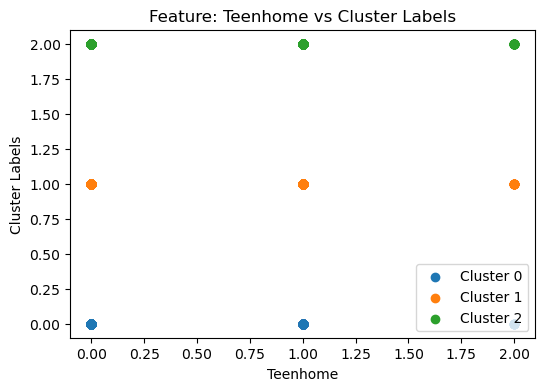

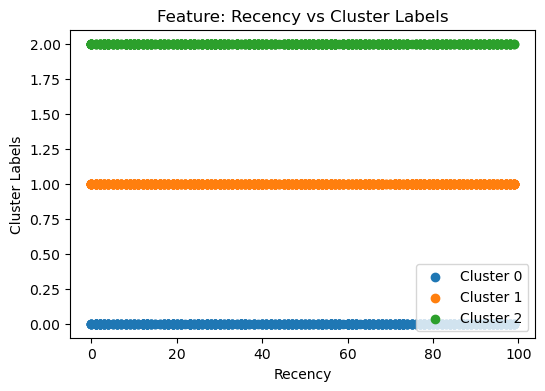

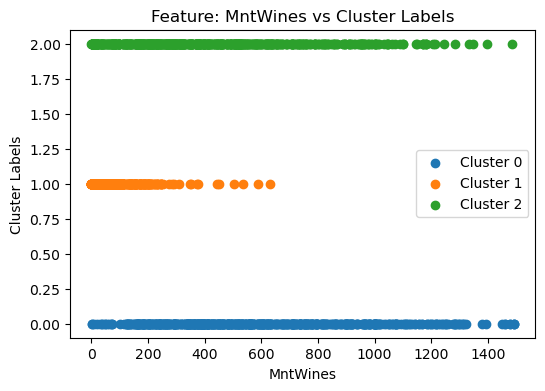

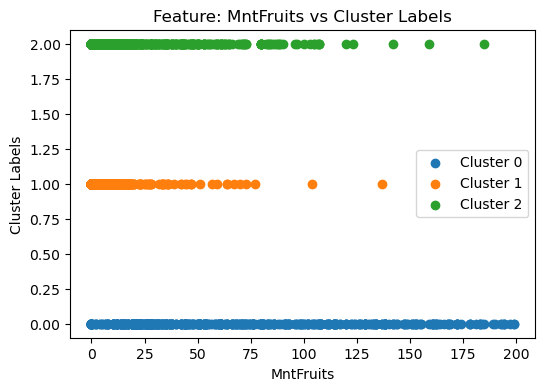

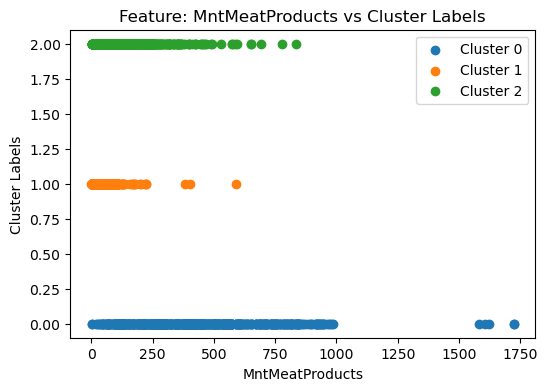

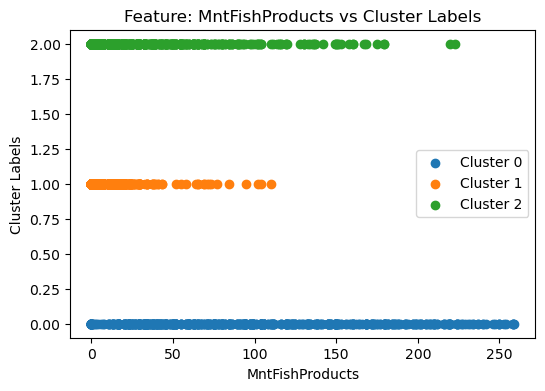

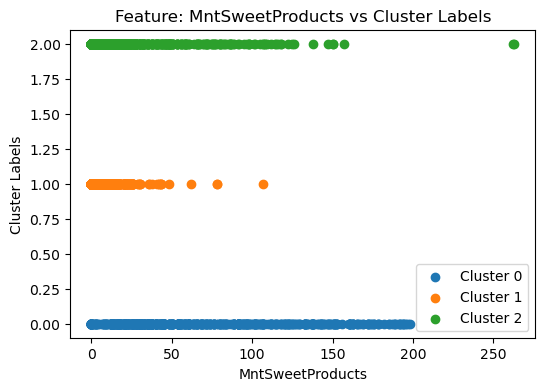

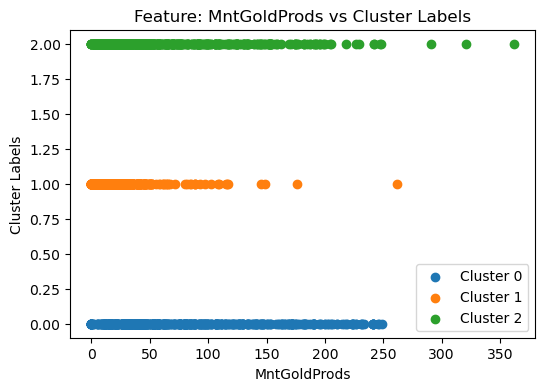

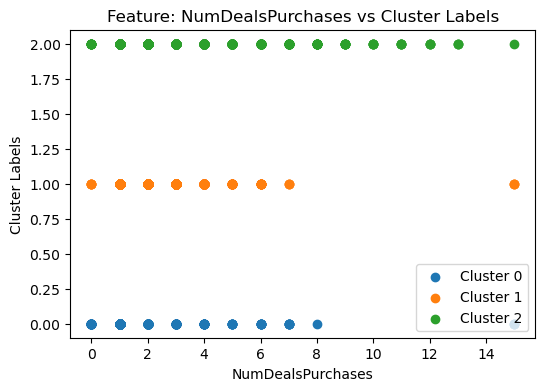

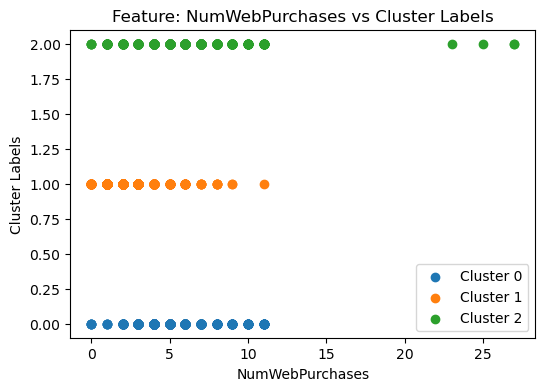

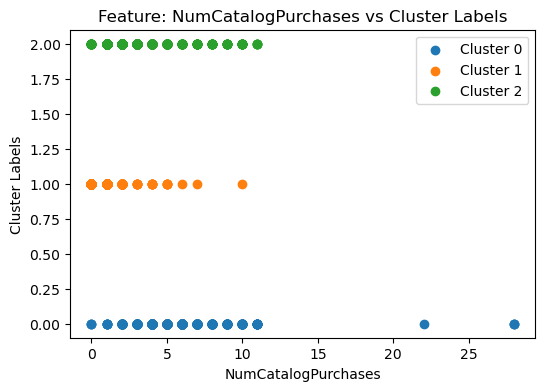

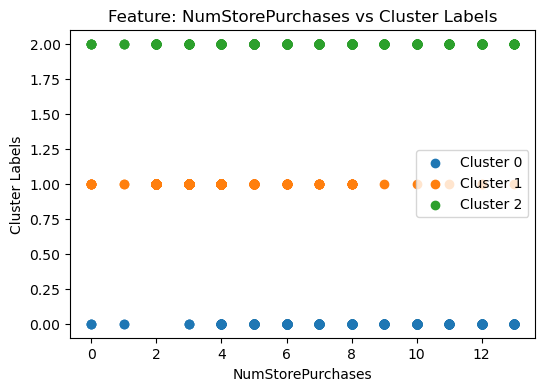

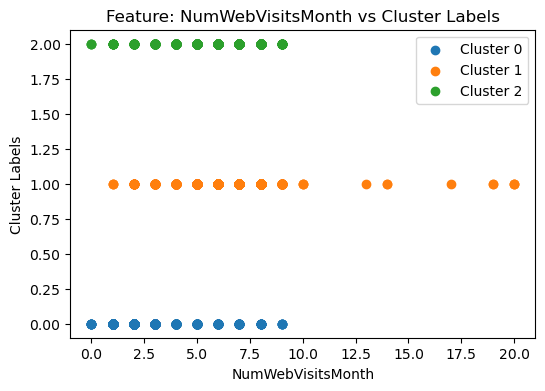

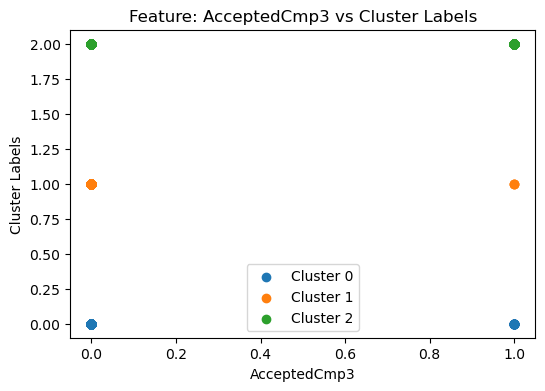

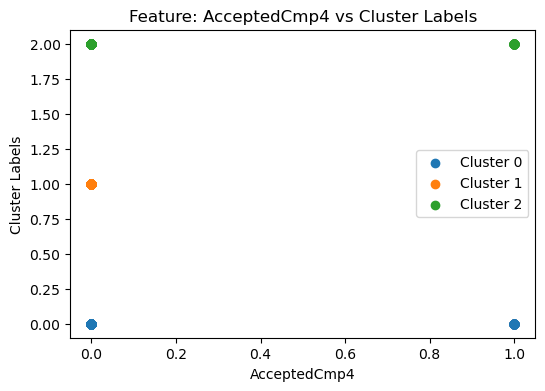

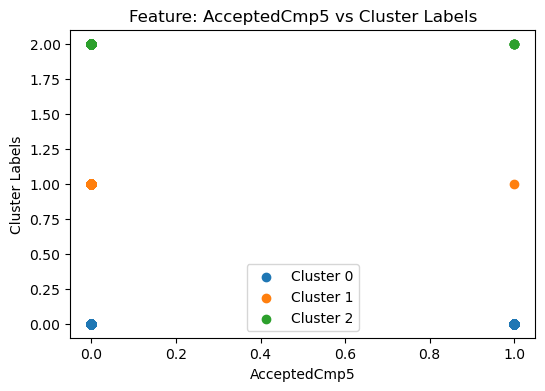

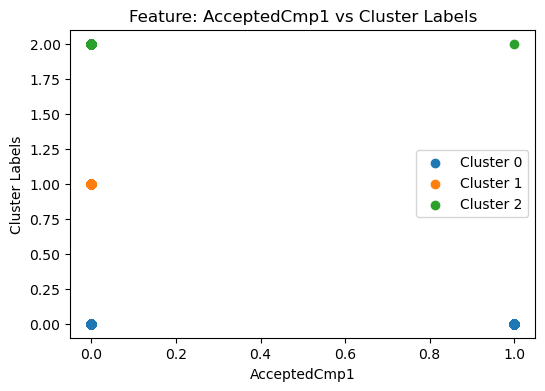

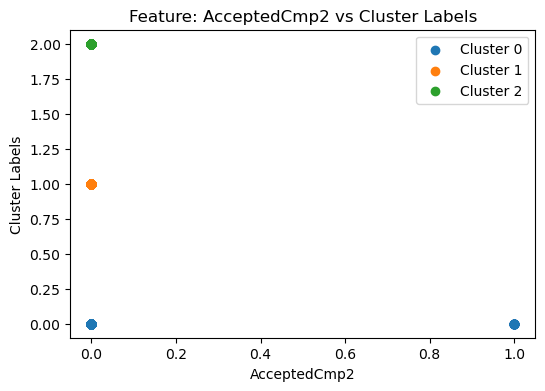

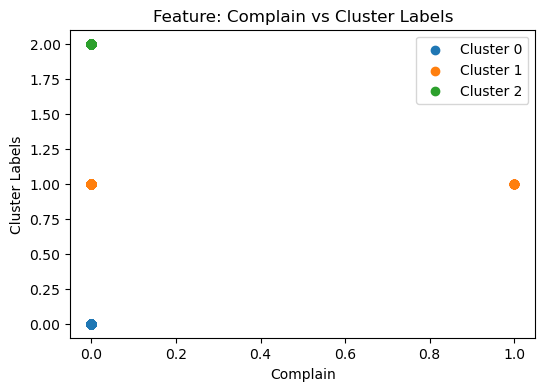

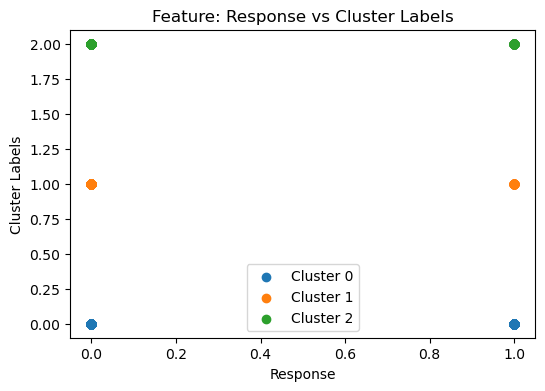

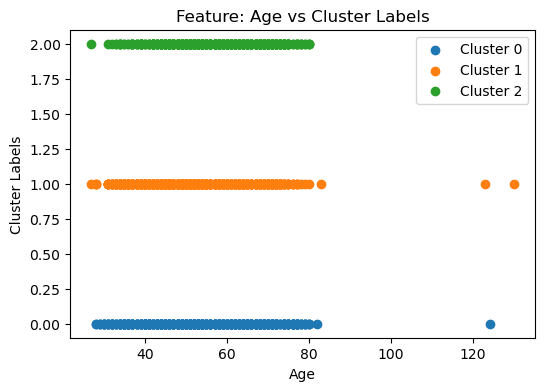

In [26]:
import matplotlib.pyplot as plt

# Bivariate analysis between the cluster label and different features
for i in range(df.shape[1] - 1):  # Now, '-1' is used because there's one less column
    plt.figure(figsize=(6, 4))
    plt.title(f"Feature: {df.columns[i]} vs Cluster Labels")
    for cluster in np.unique(clusters):
        plt.scatter(df[df['cluster_labels'] == cluster].iloc[:, i], df[df['cluster_labels'] == cluster]['cluster_labels'], label=f"Cluster {cluster}")
    plt.xlabel(df.columns[i])
    plt.ylabel('Cluster Labels')
    plt.legend()
    plt.show()